Copyright 2021 Abbrivia GmbH CC-BY (By Attribution) 4.0 https://creativecommons.org/licenses/by/4.0/legalcode

In [ ]:
import pandas as pd
import plotly.express as px

# Getting the Data

The data is taken from Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Nat Hum Behav (2021)
https://ourworldindata.org/covid-vaccinations https://covid.ourworldindata.org/data/owid-covid-data.xlsx
We use Excel because it contains the data format information in itself. If you want to run this more often consider manually downloading the data and sourcing it locally as shown in the next line (commented out).

In [2]:
#d=pd.read_excel('https://covid.ourworldindata.org/data/owid-covid-data.xlsx')

In [3]:
d=pd.read_excel('owid-covid-data.xlsx')

# Let's see what is in the dataset

In [30]:
d.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
d[['excess_mortality','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',]].describe()

excess_mortality  total_vaccinations_per_hundred  \
count       5206.000000                    37982.000000   
mean          16.132134                       59.809366   
std           31.168332                       55.314374   
min          -95.920000                        0.000000   
25%           -0.620000                        8.582500   
50%            7.135000                       44.345000   
75%           22.620000                      104.220000   
max          374.200000                      321.000000   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
count                   36490.000000                         33680.000000   
mean                       33.245154                            27.172397   
std                        27.380597                            25.620514   
min                         0.000000                             0.000000   
25%                         6.250000                             3.427500   
50%                        28.820000                            19.165000   
75%                        58.000000                            48.980000   
max                       122.180000                           118.860000   

       total_boosters_per_hundred  
count                11387.000000  
mean                     4.813813  
std                      9.323947  
min                      0.000000  
25%                      0.000000  
50%                      0.250000  
75%                      4.895000  
max                     79.960000

# pandas.DataFrame.corr
Compute pairwise correlation of columns, **excluding NA/null values**.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://www.iban.com/country-codes

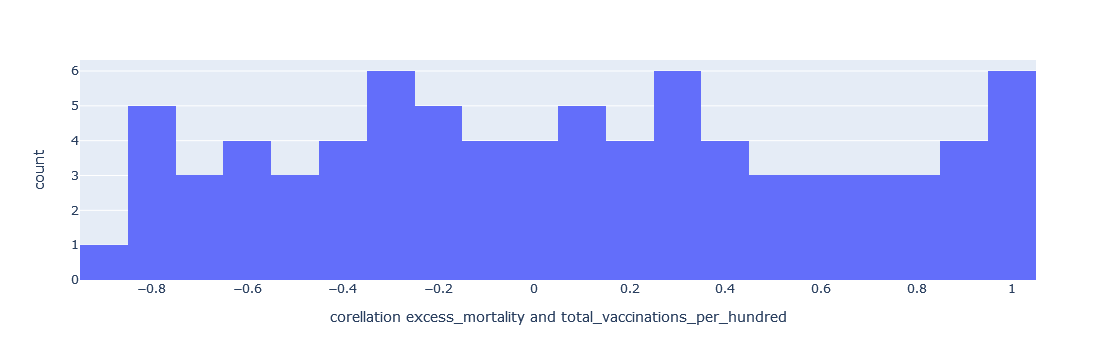

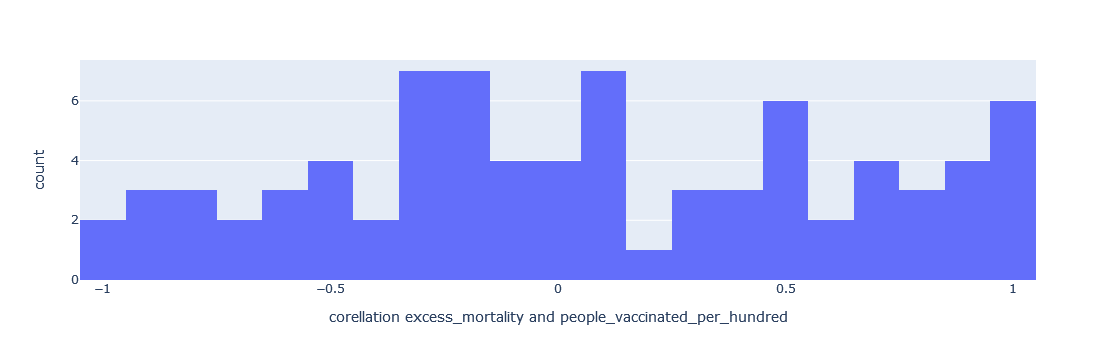

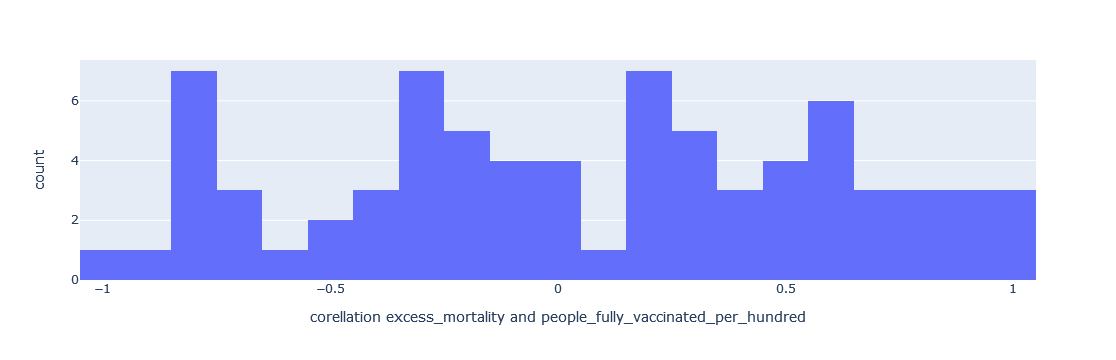

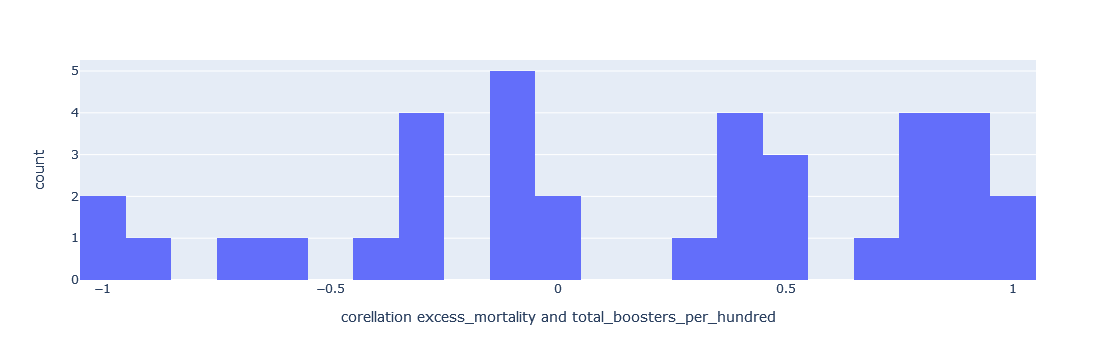

In [7]:
#pd.set_option('display.max_rows', None)
for metric in ['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',]:
    country_corr=d.groupby('iso_code')[['excess_mortality', metric]].corr().unstack().iloc[:,1].reset_index()
    country_corr.columns=['iso_code','corellation excess_mortality and '+metric]
    px.histogram(country_corr, x='corellation excess_mortality and '+metric, nbins=30,).show()

# It is surprizing that there are so many countries with very high positive corellation of excess mortality and various vaccination metrics over time.
Overal the correlation values are all over the [-1,1] interval so it is not clear what is their relationship.

The distribution is similar for all four vaccination metrics although (as expected) the number of countries we can calculate correlation is decreasing with higher level of specificity and vaccination step.

# So let's see what countries are in the dataset and what are actual correlation values?
Lets look at **total_vaccinations_per_hundred** because it has the most data available as we saw in above in dataframe describe() results.

In [28]:
pd.set_option('display.max_rows', None)
country_corr=d.groupby('iso_code')[['excess_mortality','total_vaccinations_per_hundred']].corr().unstack().iloc[:,1].reset_index()
country_corr.columns=['iso_code','corellation excess_mortality and total_vaccinations_per_hundred']
country_corr[~country_corr['corellation excess_mortality and total_vaccinations_per_hundred'].isna()]

iso_code  corellation excess_mortality and total_vaccinations_per_hundred
0         ABW                                           0.291792              
4         ALB                                          -0.238919              
8         ARM                                           1.000000              
10        AUS                                          -0.655749              
11        AUT                                           0.546910              
12        AZE                                           0.401630              
14        BEL                                           0.534626              
19        BGR                                           0.429502              
26        BOL                                          -0.178801              
27        BRA                                          -0.681382              
28        BRB                                          -0.292395              
33        CAN                                          -0.295607              
34        CHE                                           0.080393              
35        CHL                                          -0.623656              
42        COL                                          -0.026602              
49        CYP                                           0.309493              
50        CZE                                          -0.812193              
51        DEU                                           0.197256              
54        DNK                                           0.860464              
57        ECU                                          -0.806358              
60        ESP                                           0.144421              
61        EST                                           0.272986              
63        FIN                                           0.783782              
66        FRA                                          -0.264831              
67        FRO                                          -0.239522              
70        GBR                                          -0.099850              
71        GEO                                           0.826510              
79        GRC                                           0.583481              
81        GRL                                           1.000000              
82        GTM                                           0.965872              
84        HKG                                           0.442201              
86        HRV                                          -0.537236              
88        HUN                                          -0.014416              
92        IRL                                           0.178375              
93        IRN                                          -0.938660              
96        ISR                                           0.063114              
97        ITA                                          -0.353792              
101       JPN                                           0.382192              
102       KAZ                                           0.689450              
104       KGZ                                          -0.556506              
108       KOR                                           0.726402              
111       LBN                                          -0.570560              
115       LIE                                          -0.481178              
118       LTU                                           0.296412              
119       LUX                                           0.168158              
120       LVA                                           0.472899              
121       MAC                                          -0.229877              
124       MDA                                          -0.447150              
127       MEX                                          -0.180293              
129       MKD                                          

# Data Exploration to Exclude Meaningless Datapoints
We need to make some very basic decisions as to which countries to include into our analysis. Some do not have enough meaningful data. 

So first we only keep countries where the correlation can be calculated at all (at least some mutual data points present).

Then we exclude rows with no excess mortality data at all and visualize the data.
         

In [20]:
countries_worth_looking_at=list(country_corr[~country_corr['corellation excess_mortality and total_vaccinations_per_hundred'].isna()]['iso_code'])

In [40]:
df=d[ (~d['excess_mortality'].isnull()) & (d['iso_code'].isin(countries_worth_looking_at)) ]

What we will see is that the total_vaccinations_per_hundred data is not contigious but at least it is monotonous as one should expect. It may be helpful to fill the blanks with some polinomial approximation.

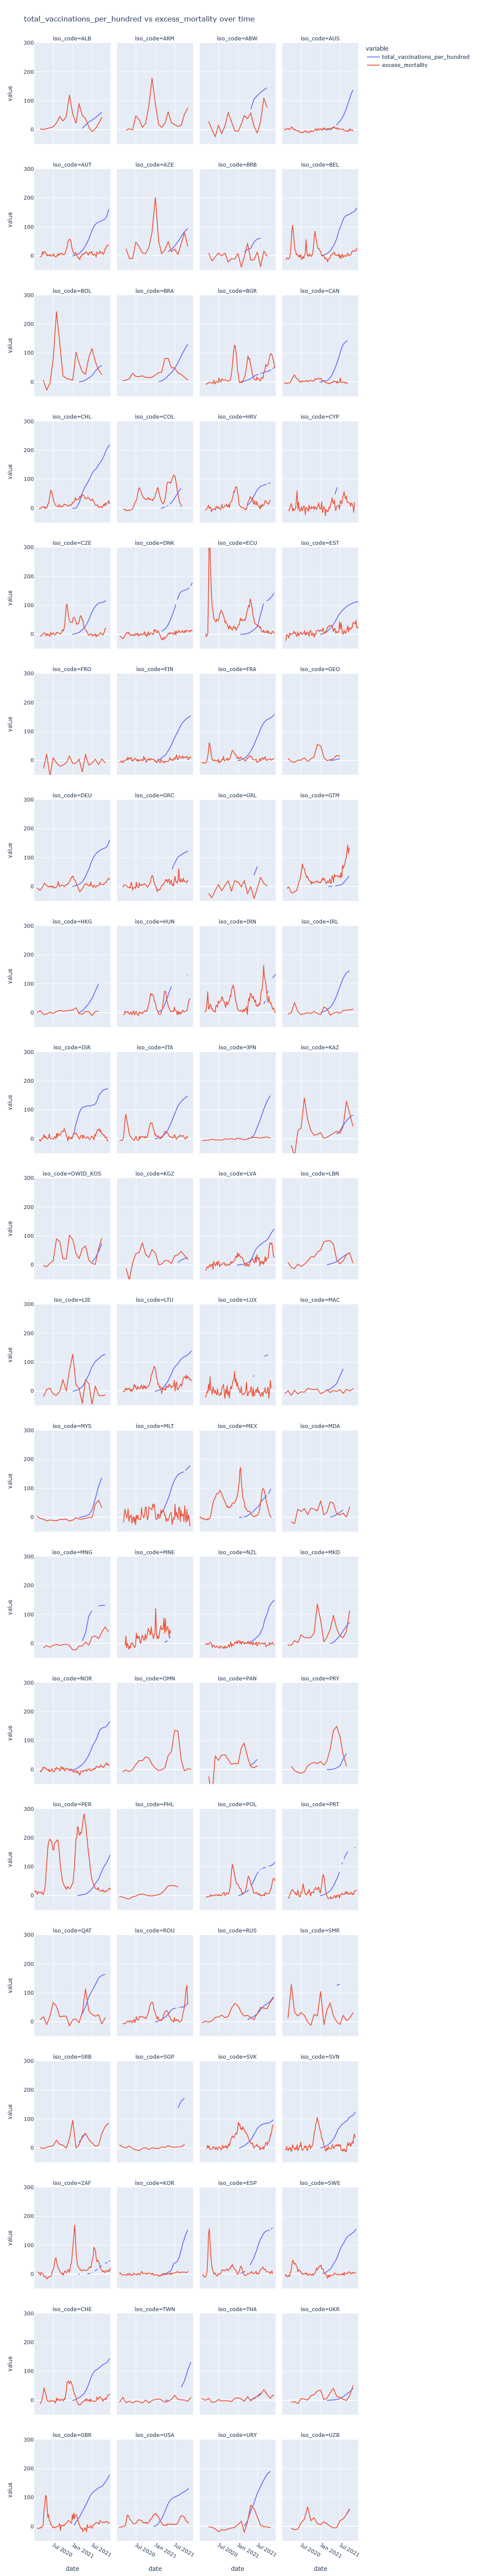

In [25]:
 fig = px.line(df,    
              x='date',
              y=['total_vaccinations_per_hundred','excess_mortality'],
              facet_col='iso_code', 
              facet_col_wrap=4,
              facet_row_spacing=0.01,
              height=6000,
              title="total_vaccinations_per_hundred vs excess_mortality over time"
             )
fig.update_yaxes(range=[-50, 300])
fig.show()

Lets exclude ['ARM','FRO','OMN','PHL']

In [34]:
for country in ['ARM','FRO','OMN','PHL']: countries_worth_looking_at.remove(country)

In [38]:
df=d[ (~d['excess_mortality'].isnull()) & (d['iso_code'].isin(countries_worth_looking_at)) ]

As expected the data on "fully" vaccinated is less availabe and we would have to exclude 'SMR','LUX' at least. So let's stick to total_vaccinations_per_hundred, in theory every vaccination should be helpful. 

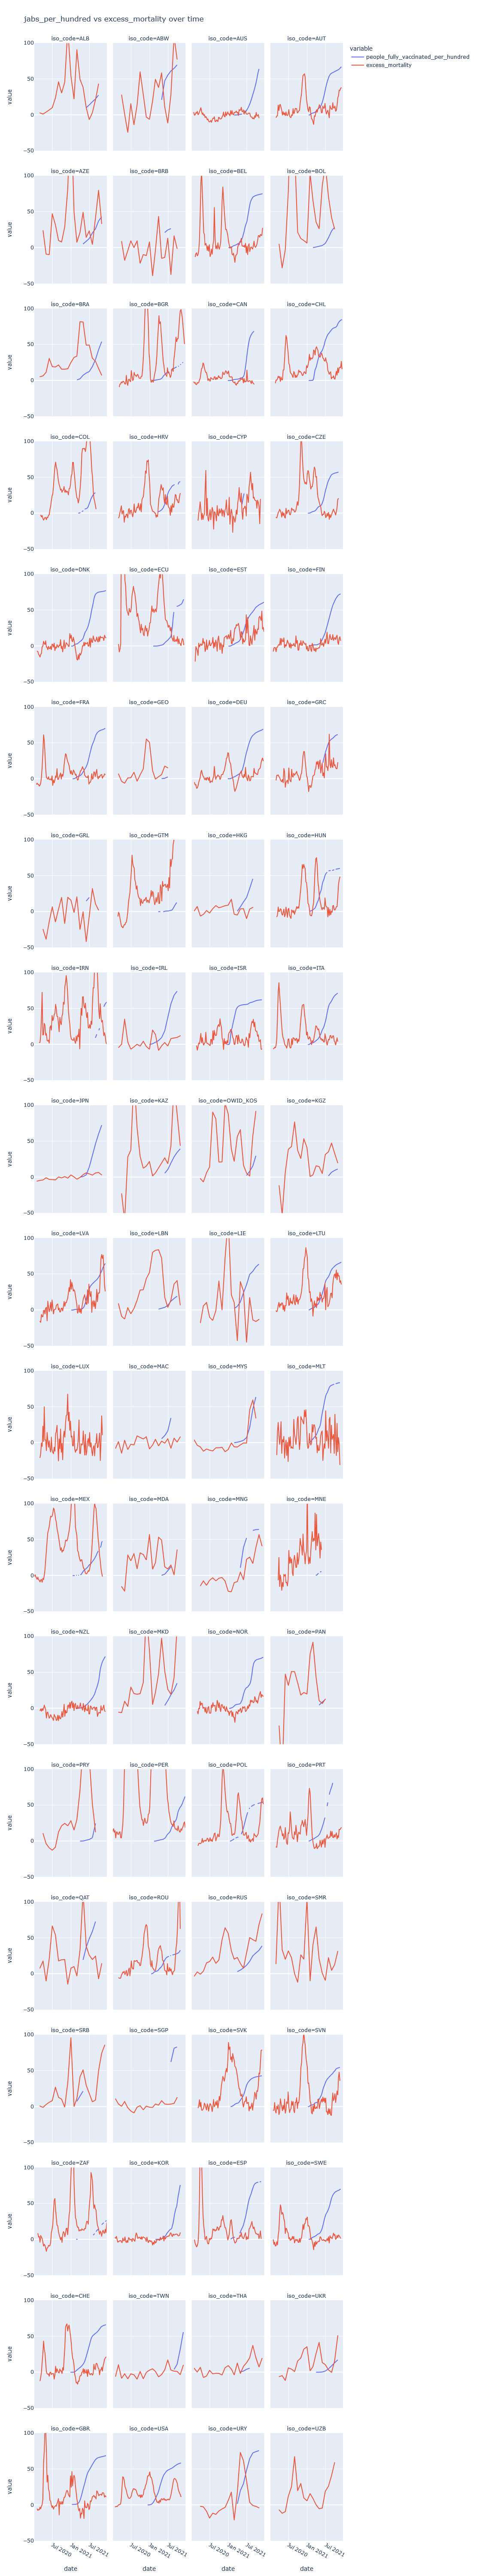

In [39]:
fig = px.line(df,    
              x='date',
              y=['people_fully_vaccinated_per_hundred','excess_mortality'],
              facet_col='iso_code', 
              facet_col_wrap=4,
              facet_row_spacing=0.01,
              height=6000,
              title="jabs_per_hundred vs excess_mortality over time"
             )
fig.update_yaxes(range=[-50, 100])
fig.show()